# Plotting and Fitting with Python

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy.table import QTable

### Simple Plotting

In [2]:
t = np.linspace(0,2,100)               # 100 points linearly spaced between 0.0 and 2.0
s = np.cos(2*np.pi*t) * np.exp(-t)     # s if a function of t

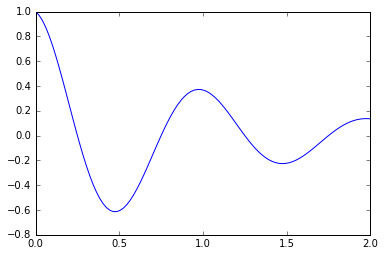

In [3]:
plt.plot(t,s)

### Simple plotting - with *style*

The default style of `matplotlib` is a bit lacking in style. Some would term it ugly. The new version of `matplotlib` has added some new styles that you can use in place of the default. Changing the style will effect all of the rest of the plots on the notebook.

In [4]:
plt.style.available

['seaborn-colorblind',
 'seaborn-paper',
 'seaborn-bright',
 'ggplot',
 'bmh',
 'seaborn-white',
 'seaborn-darkgrid',
 'dark_background',
 'seaborn-ticks',
 'seaborn-muted',
 'seaborn-talk',
 'classic',
 'seaborn-pastel',
 'seaborn-deep',
 'seaborn-poster',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'grayscale']

In [5]:
plt.style.use('ggplot')

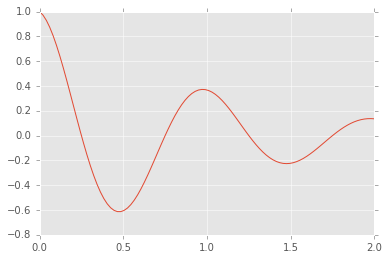

In [6]:
plt.plot(t,s)

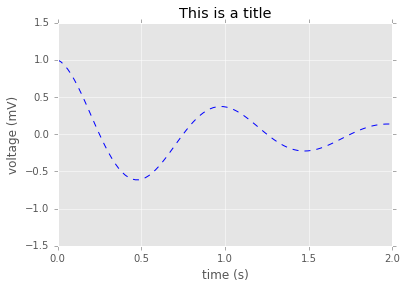

In [7]:
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('This is a title')

plt.ylim(-1.5,1.5)

plt.plot(t, s, color='b', marker='None', linestyle='--');   # adding the ';' at then suppresses the Out[] line; b = blue

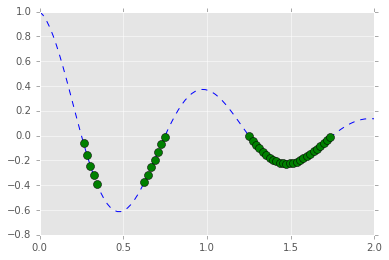

In [8]:
mask1 = np.where((s>-0.4) & (s<0))

plt.plot(t, s, color='b', marker='None', linestyle='--')

plt.plot(t[mask1],s[mask1],color="g",marker="o",linestyle="None",markersize=8);

#### In addition, you can specify colors in many different ways:

- Grayscale intensities: `color = '0.8'`
- RGB triplets: `color = (0.3, 0.1, 0.9)`
- Hex strings: `color = '#7ff00'`
- [HTML color names](http://www.w3schools.com/html/html_colornames.asp): `color = 'Chartreuse'`

### matplotlib will work with Astropy units

In [9]:
from astropy import units as u

from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fc13e623550>

In [10]:
v = 10 * u.m / u.s
t2 = np.linspace(0,10,1000) * u.s
y = v * t2

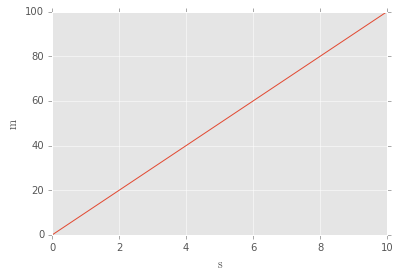

In [11]:
plt.plot(t2,y)

### Simple Histograms

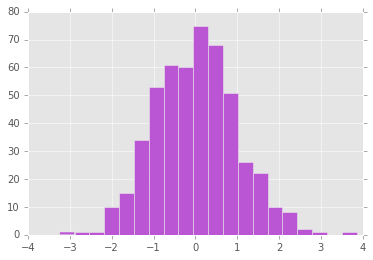

In [12]:
#Histogram of "h" with 20 bins

np.random.seed(42)
h = np.random.randn(500)

plt.hist(h, bins=20, facecolor='MediumOrchid');

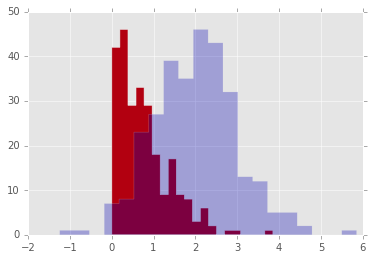

In [47]:
mask2 = np.where(h>0.0)

np.random.seed(42)
j = np.random.normal(2.0,1.0,300)  # normal dist, ave = 2.0, std = 1.0

plt.hist(h[mask2], bins=20, facecolor='#b20010', histtype='stepfilled')
plt.hist(j,        bins=20, facecolor='#0200b0', histtype='stepfilled', alpha = 0.30);

## You have better control of the plot with the `object oriented` interface.

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between matlab-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

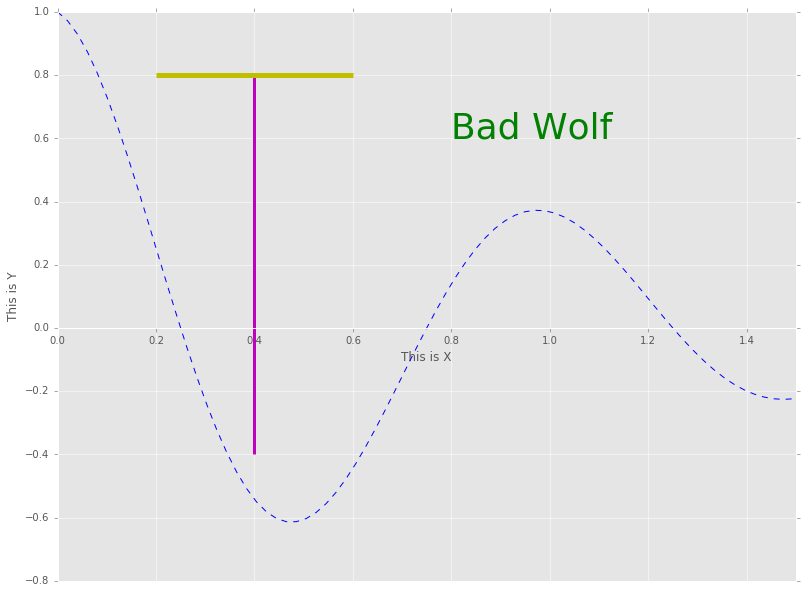

In [14]:
fig,ax = plt.subplots(1,1)                    # One window
fig.set_size_inches(11,8.5)                   # (width,height) - letter paper landscape

fig.tight_layout()                          # Make better use of space on plot

ax.set_xlim(0.0,1.5)

ax.spines['bottom'].set_position('zero')    # Move the bottom axis line to x = 0

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(t, s, color='b', marker='None', linestyle='--')

ax.text(0.8, 0.6, 'Bad Wolf', color='green', fontsize=36)            # You can place text on the plot

ax.vlines(0.4, -0.4, 0.8, color='m', linewidth=3)                    # vlines(x, ymin, ymax)
ax.hlines(0.8,  0.2, 0.6, color='y', linewidth=5)                    # hlines(y, xmin, xmax)

In [15]:
fig.savefig('fig1.png', bbox_inches='tight')

In [16]:
!ls *.png

fig1.png


In [17]:
!display fig1.png

### Subplots
- `subplot(rows,columns)`
- Access each subplot like a matrix. `[x,y]`
- For example: `subplot(2,2)` makes four panels with the coordinates:

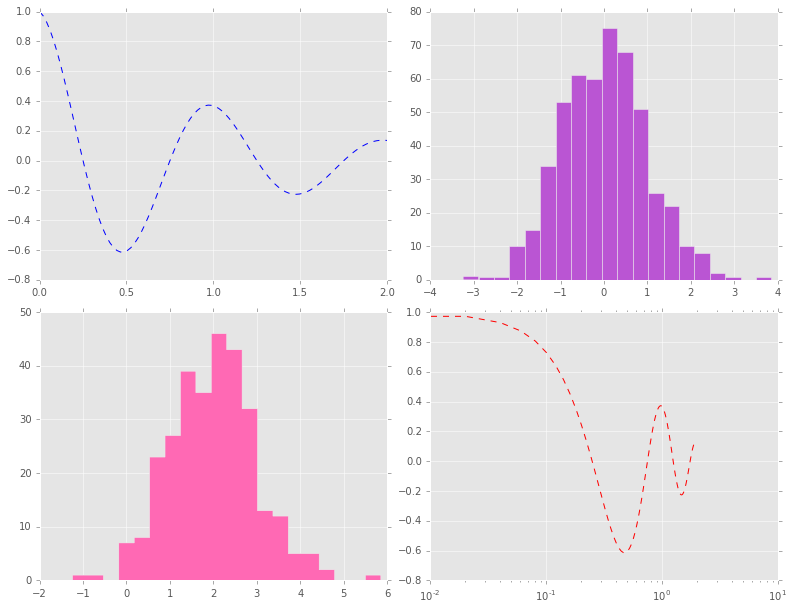

In [18]:
fig, ax = plt.subplots(2,2)                                               # 2 rows 2 columns
fig.set_size_inches(11,8.5)                                               # width, height

fig.tight_layout()                                                        # Make better use of space on plot

ax[0,0].plot(t, s, color='b', marker='None', linestyle='--')              # Plot at [0,0]

ax[0,1].hist(h, bins=20, facecolor='MediumOrchid')                        # Plot at [0,1]

ax[1,0].hist(j,bins=20, facecolor='HotPink', histtype='stepfilled')       # Plot at [1,0]

ax[1,1].set_xscale('log')                                                 # Plot at [1,1] - x-axis set to log
ax[1,1].plot(t, s, color='r', marker='None', linestyle='--'); 

## An Astronomical Example - Color Magnitude Diagrams

In [19]:
T = QTable.read('M15_Bright.csv', format='ascii.csv')
T[0:3]

Star,RA,Dec,Vmag,Bmag,Umag
int64,float64,float64,float64,float64,float64
8,11.883,14.729,14.659,15.562,15.894
12,19.811,6.584,18.549,19.215,19.148
26,7.5,18.911,15.897,16.409,16.52


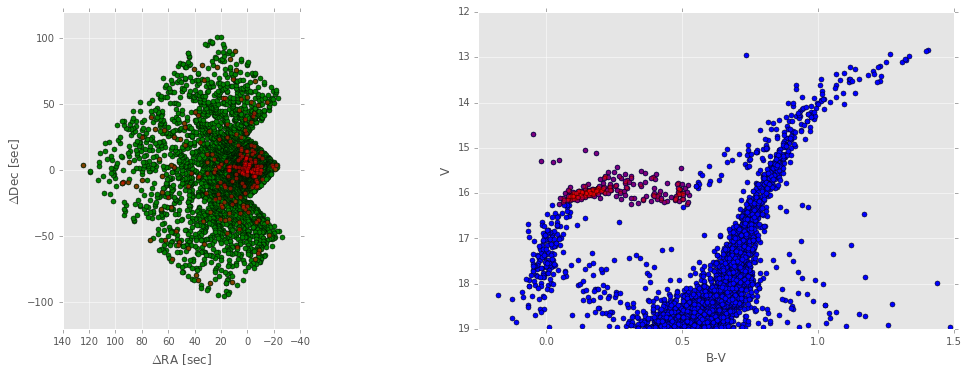

In [20]:
fig, ax = plt.subplots(1,2)                 # 1 row, 2 colums
fig.set_size_inches(15,5)

fig.tight_layout()

# The plot for [0,0]

ax[0].set_xlim(-40,140)
ax[0].set_ylim(-120,120)

ax[0].set_aspect('equal')                    # Force intervals in x = intervals in y
ax[0].invert_xaxis()                         # RA increases to the left!

ax[0].set_xlabel("$\Delta$RA [sec]")
ax[0].set_ylabel("$\Delta$Dec [sec]")

ax[0].plot(T['RA'], T['Dec'],color="g",marker="o",linestyle="None",markersize=5);

# The plot for [0,1]

BV = T['Bmag'] - T['Vmag']
V = T['Vmag']

ax[1].set_xlim(-0.25,1.5)
ax[1].set_ylim(12,19)

ax[1].set_aspect(1/6)         # Make 1 unit in X = 6 units in Y
ax[1].invert_yaxis()          # Magnitudes increase to smaller values

ax[1].set_xlabel("B-V")
ax[1].set_ylabel("V")

ax[1].plot(BV,V,color="b",marker="o",linestyle="None",markersize=5);

# overplotting

maskC = np.where((V < 16.25) & (BV < 0.55))     

ax[0].plot(T['RA'][maskC], T['Dec'][maskC],color="r",marker="o",linestyle="None",markersize=4, alpha=0.5)
ax[1].plot(BV[maskC], V[maskC],color="r",marker="o",linestyle="None",markersize=4, alpha=0.5);

## Curve Fitting

In [21]:
D1 = QTable.read('data1.csv', format='ascii.csv')
D1[0:2]

x,y
float64,float64
0.4,-4.28874144048
1.9,22.0030414699


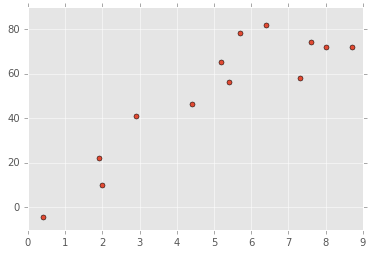

In [22]:
plt.plot(D1['x'],D1['y'],marker="o",linestyle="None",markersize=5);

In [23]:
# 1-D fit y = ax + b

Fit1 = np.polyfit(D1['x'],D1['y'],1) # 1 - one dimension

Fit1       # The coefficients of the fit (a,b)

array([ 9.4650469,  3.8158527])

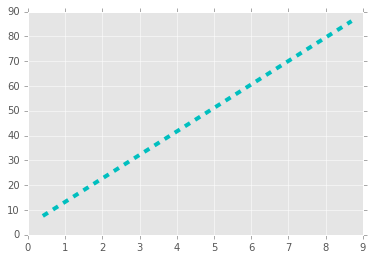

In [50]:
Yfit = np.polyval(Fit1,D1['x'])   # The polynomial of Fit1 applied to the points D1['x']

plt.plot(D1['x'], D1['y'], marker="o", linestyle="None", markersize=5)

plt.plot(D1['x'], Yfit, linewidth=4, color='c', linestyle='--')

In [25]:
D2 = QTable.read('data2.csv', format='ascii.csv')

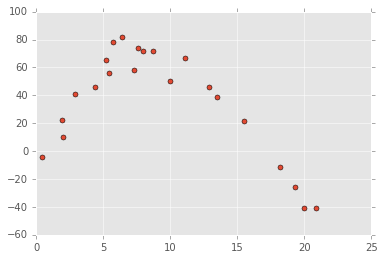

In [26]:
plt.plot(D2['x'],D2['y'],marker="o",linestyle="None",markersize=5);

In [27]:
# 2-D fit y = ax**2 + bx + c

Fit2 = np.polyfit(D2['x'],D2['y'],2)

Fit2

array([ -0.87495323,  15.67578454,  -2.22790887])

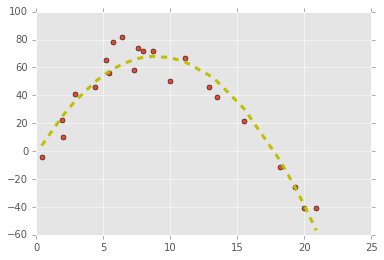

In [28]:
Yfit = np.polyval(Fit2,D2['x'])

plt.plot(D2['x'], D2['y'], marker="o", linestyle="None", markersize=5)

plt.plot(D2['x'], Yfit, linewidth=3, color='y', linestyle='--');

/astro/classes/Astro_300/miniconda/lib/python3.4/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


(-20, 120)

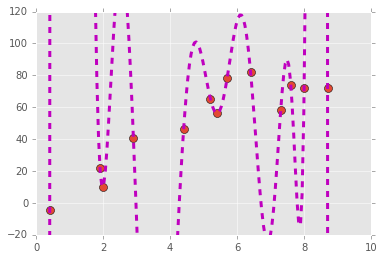

In [29]:
# Be careful, very high-order fits may be garbage

Fit3 = np.polyfit(D1['x'],D1['y'],20)

xx = np.linspace(0,10,200)

Yfit = np.polyval(Fit3,xx)

plt.plot(D1['x'], D1['y'], marker="o", linestyle="None", markersize=8)
plt.plot(xx, Yfit, linewidth=3, color='m', linestyle='--');

plt.ylim(-20,120)

## Fitting a specific function

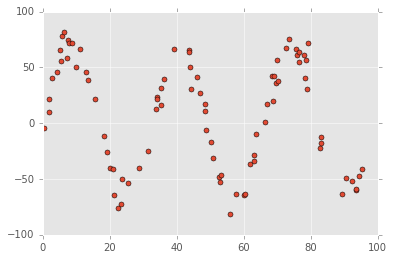

In [30]:
D3 = QTable.read('data3.csv', format='ascii.csv')

plt.plot(D3['x'],D3['y'],marker="o",linestyle="None",markersize=5);

In [31]:
from scipy.optimize import curve_fit

$$ \Large f(x) = a \sin(bx) $$

In [32]:
def ringo(x,a,b):
    return a*np.sin(b*x)

In [51]:
Aguess = 75 #need guess
Bguess = 1.0/5.0

fitpars, error = curve_fit(ringo,D3['x'],D3['y'],p0=[Aguess,Bguess])

# Function to fit = ringo
# X points to fit = D3['x']
# Y points to fit = D3['y']
# Initial guess at values for a,b = [Aguess,Bguess]

print(fitpars)

[ 68.14778865   0.1911845 ]


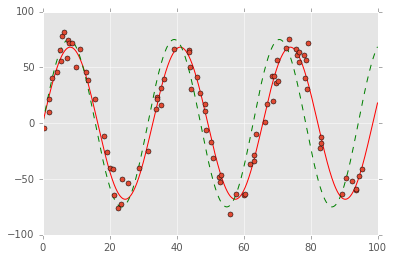

In [34]:
Z = np.linspace(0,100,1000)

plt.plot(Z, ringo(Z, *fitpars), 'r-') #*fitpars --> however many vars in array
plt.plot(Z, ringo(Z,Aguess,Bguess), 'g--')

plt.plot(D3['x'],D3['y'],marker="o",linestyle="None",markersize=5);

### Bad initial guesses can lead to very bad fits

[ 4.55024564  0.99176996]


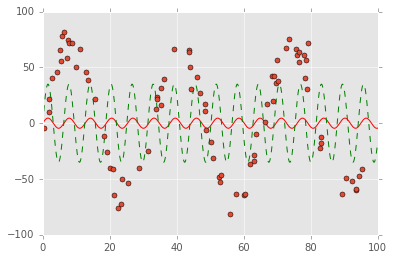

In [35]:
Aguess = 35
Bguess = 1.0

fitpars, error = curve_fit(ringo,D3['x'],D3['y'],p0=[Aguess,Bguess])

print(fitpars)

plt.plot(Z, ringo(Z, *fitpars), 'r-')
plt.plot(Z, ringo(Z,Aguess,Bguess), 'g--')

plt.plot(D3['x'],D3['y'],marker="o",linestyle="None",markersize=5);

# Interactive Plots

In [36]:
from ipywidgets import interact

In [37]:
def PlotSin(f):
    x = np.linspace(0,1,100)
    y = np.sin(2.0 * np.pi * x * f)
    plt.ylim(-1.1,1.1)
    plt.xlim(0,1)
    plt.plot(x,y)

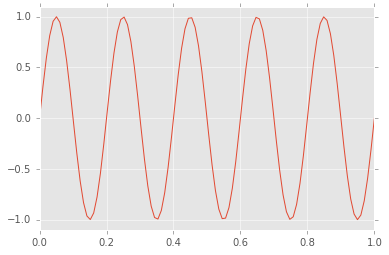

In [38]:
PlotSin(5)

<function __main__.PlotSin>

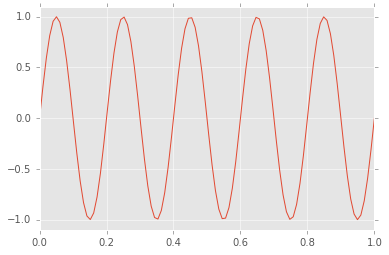

In [39]:
interact(PlotSin, f=(1,10,0.5))

In [40]:
def PlotSinA(f,a):
    x = np.linspace(0,1,100)
    y = a * np.sin(2.0 * np.pi * x * f)
    plt.xlim(0,1)
    plt.plot(x,y)

<function __main__.PlotSinA>

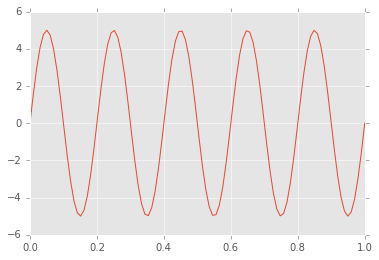

In [41]:
interact(PlotSinA, f = (1,10,0.5), a = (1,10,0.5))

# Plotting Extras

### Adding Legends

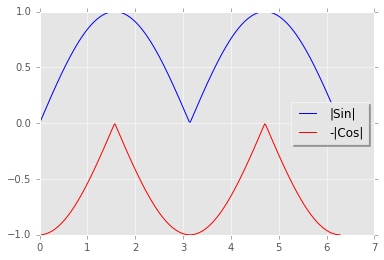

In [42]:
theta = np.linspace(0.0,2*np.pi,300)

y1 = abs(np.sin(theta))
y2 = -abs(np.cos(theta))

plt.plot(theta, y1, color="b", label="|Sin|")
plt.plot(theta, y2, color="r", label="-|Cos|")

plt.legend(loc=0,shadow=True);

### Polar Plots

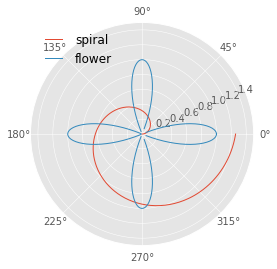

In [43]:
plt.polar(theta,theta/5.0,label="spiral")
plt.polar(theta,np.cos(4*theta),label="flower")

plt.legend(loc=2, frameon=False);

### Everyone likes Pie

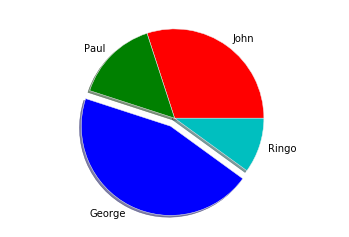

In [44]:
plt.axis('equal')

labels = ('John', 'Paul' ,'George' ,'Ringo')     # Name of slices
sizes = [0.3, 0.15, 0.45, 0.10]                  # Size of slices
colors = ['r', 'g', 'b', 'c']                    # Color of Slices
explode = (0, 0, 0.1, 0)                         # Offset slide 3

plt.pie(sizes,explode=explode,labels=labels,colors=colors,shadow=True);

### Pseudo 3D plots

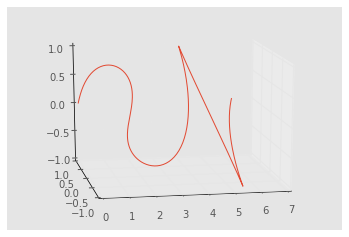

In [45]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.axes(projection='3d')
xx = np.cos(3*theta)
yy = np.sin(2*theta)

ax.plot(theta,xx,yy);
ax.view_init(azim = -100,elev = 15)